In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('data_for_MIPT.csv')

In [7]:
df.head()

,DateTime,sect1_pressure_delta_1,sect1_pressure_delta_2,sect1_pressure_delta_3,sect1_pressure_delta_4,sect1_pressure_delta_5,sect1_pressure_delta_6,sect1_pressure_delta_7,sect1_pressure_delta_8,sect1_pressure_delta_9,...,sect4_temperature_5,sect4_temperature_6,sect4_temperature_7,sect4_temperature_8,sect4_temperature_9,sect4_temperature_10,outdoor_temperature,cat_lab_analyzer,cat_days,target
0,2015-02-16 22:00:00,7.541152,10.386788,8.500485,-3.249602,-2.346666,6.378279,6.408336,2.647874,-9.763069,...,-13.416621,-19.186629,1.118459,0.712518,0.769342,0.749822,-21.249004,3.458157,-17.728577,9.857031
1,2015-02-16 23:00:00,7.492223,10.263227,8.198465,-3.285257,-2.994988,6.182254,6.385509,2.426729,-10.754015,...,-0.128892,-5.337200,0.885007,0.661143,0.668626,0.634798,-20.905675,3.505063,-17.720685,9.813562
2,2015-02-17 00:00:00,7.190766,10.196760,8.251586,-3.600602,-2.648142,6.079277,6.800319,2.429849,-11.342342,...,0.102358,-3.343891,0.566352,0.671236,0.889597,0.938337,-19.227131,3.551970,-17.712794,10.067452
3,2015-02-17 01:00:00,7.370268,10.178554,8.175640,-3.796317,-1.521489,5.987363,6.973832,3.350226,-9.102813,...,-0.591394,-2.800186,2.769581,0.689609,0.761496,0.817412,-17.519186,3.598877,-17.704902,9.797466
4,2015-02-17 02:00:00,7.440239,10.165816,8.403034,-3.423693,-0.511369,6.200140,6.858198,3.195567,-10.446927,...,2.013135,-1.665570,0.578314,0.712934,0.550861,0.403983,-16.890281,3.645783,-17.697011,9.427784


In [8]:
tr = df['target']

In [9]:
f = tr.as_matrix()

/home/yakudza/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


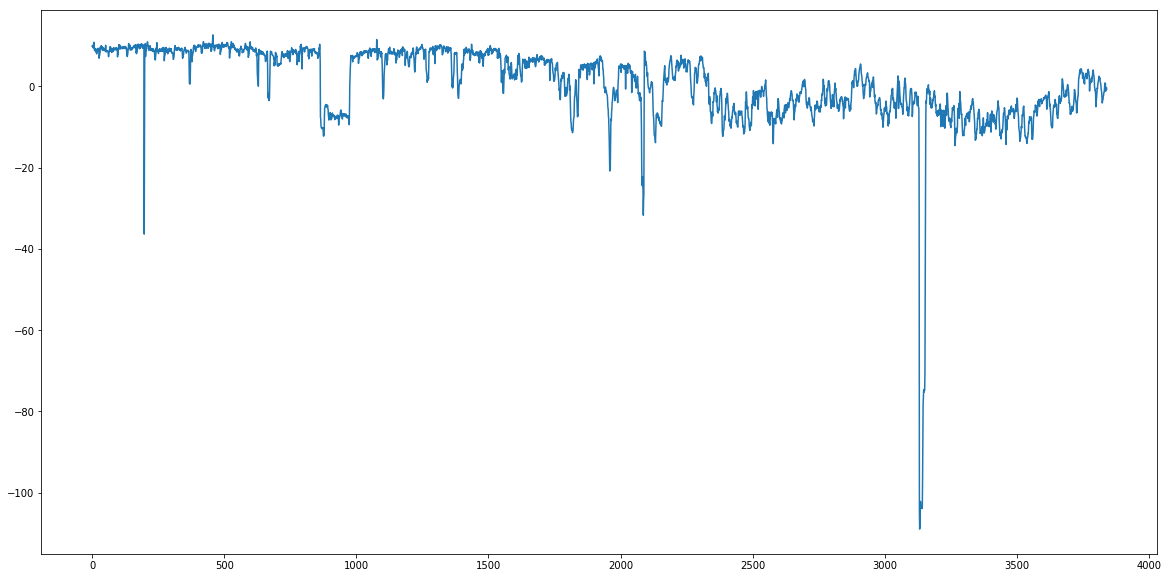

In [10]:
plt.figure(figsize = (20, 10))
plt.plot(f)
plt.show()

In [11]:
hd = list(df)[0:-1]

In [12]:
from datetime import datetime

In [13]:
def timestamp(tme):
    return datetime.strptime(tme, '%Y-%m-%d %H:%M:%S').timestamp()

In [14]:
df['DateTime'] = df['DateTime'].map(timestamp)

AttributeError: 'datetime.datetime' object has no attribute 'timestamp'

In [15]:
df.head()

,DateTime,sect1_pressure_delta_1,sect1_pressure_delta_2,sect1_pressure_delta_3,sect1_pressure_delta_4,sect1_pressure_delta_5,sect1_pressure_delta_6,sect1_pressure_delta_7,sect1_pressure_delta_8,sect1_pressure_delta_9,...,sect4_temperature_5,sect4_temperature_6,sect4_temperature_7,sect4_temperature_8,sect4_temperature_9,sect4_temperature_10,outdoor_temperature,cat_lab_analyzer,cat_days,target
0,2015-02-16 22:00:00,7.541152,10.386788,8.500485,-3.249602,-2.346666,6.378279,6.408336,2.647874,-9.763069,...,-13.416621,-19.186629,1.118459,0.712518,0.769342,0.749822,-21.249004,3.458157,-17.728577,9.857031
1,2015-02-16 23:00:00,7.492223,10.263227,8.198465,-3.285257,-2.994988,6.182254,6.385509,2.426729,-10.754015,...,-0.128892,-5.337200,0.885007,0.661143,0.668626,0.634798,-20.905675,3.505063,-17.720685,9.813562
2,2015-02-17 00:00:00,7.190766,10.196760,8.251586,-3.600602,-2.648142,6.079277,6.800319,2.429849,-11.342342,...,0.102358,-3.343891,0.566352,0.671236,0.889597,0.938337,-19.227131,3.551970,-17.712794,10.067452
3,2015-02-17 01:00:00,7.370268,10.178554,8.175640,-3.796317,-1.521489,5.987363,6.973832,3.350226,-9.102813,...,-0.591394,-2.800186,2.769581,0.689609,0.761496,0.817412,-17.519186,3.598877,-17.704902,9.797466
4,2015-02-17 02:00:00,7.440239,10.165816,8.403034,-3.423693,-0.511369,6.200140,6.858198,3.195567,-10.446927,...,2.013135,-1.665570,0.578314,0.712934,0.550861,0.403983,-16.890281,3.645783,-17.697011,9.427784


In [87]:
data = df.as_matrix()

/home/yakudza/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [88]:
print(data.shape)
x_data = []
y_data = []
for i in range(len(data)):
    x_data.append(data[i][1:-1])
    y_data.append(data[i][-1])
x_data = np.array(x_data)
y_data = np.array(y_data)

(3841, 153)


In [129]:
train=df[manipulated]

x_train, x_test, y_train, y_test = train_test_split(train, y_data)

x_trai

,sect1_flow_16,sect1_flow_22,sect1_temperature_1,sect1_temperature_5,sect1_temperature_10,sect1_temperature_11
882,0.644487,6.053319,-7.078502,-8.179508,-7.073448,-5.591631
2927,0.592977,6.424647,1.508857,0.722164,0.891256,0.520772
2291,0.592503,6.125935,0.517607,1.633362,0.644784,0.734022
2148,0.660211,6.314502,0.161983,-1.917294,-0.799816,1.100335
3383,0.582687,-16.612629,1.055948,-1.868504,0.663104,0.948340
462,0.634537,6.177671,0.779018,3.243278,1.555945,2.096649
3231,0.599985,-17.326716,3.013841,-0.647373,2.307171,1.168812
3522,0.572188,-17.063343,2.362341,-1.629781,1.035884,1.085095
3662,0.580728,-16.441343,1.823607,0.215546,2.471686,1.268731
2452,0.568804,6.505688,0.941054,-1.494114,-0.117530,0.538864


In [131]:
x_train=np.array(x_train)
x_train

array([[ 0.64448707,  6.05331905, -7.07850222, -8.17950772, -7.07344849,
        -5.5916314 ],
       [ 0.59297703,  6.42464676,  1.50885668,  0.72216367,  0.89125559,
         0.52077205],
       [ 0.59250283,  6.12593519,  0.51760716,  1.6333624 ,  0.64478413,
         0.73402154],
       ...,
       [ 0.68115225,  6.08149501,  1.34174976,  2.91869653,  1.18967287,
         1.10187131],
       [ 0.56623806,  6.17265973,  1.32238569,  2.68124729,  1.69286032,
         1.49301455],
       [ 0.58506128,  6.12395491,  1.02328659, -0.94482171, -0.178997  ,
         0.83600712]])

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2880, 151)
(961, 151)
(2880,)
(961,)


In [146]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

(3841, 151)
(3841,)
9.857030934095055


In [84]:
model = xgboost.XGBRegressor()

In [132]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [98]:
x_train=df[manipulated]


,sect1_flow_16,sect1_flow_22,sect1_temperature_1,sect1_temperature_5,sect1_temperature_10,sect1_temperature_11
0,0.636513,5.920720,-0.669084,2.551822,0.195712,1.386334
1,0.574331,5.676701,-0.832248,2.152464,-0.202138,1.323345
2,0.572504,5.863509,-0.909011,2.391060,-0.290482,1.702284
3,0.575952,5.964503,-0.993253,2.559465,0.056025,1.675897
4,0.573351,6.116941,-0.954418,2.223928,-0.056906,1.697102
5,0.618773,5.980141,-0.918453,2.460741,0.012998,1.817553
6,0.545130,6.127987,-1.070445,2.446473,-0.444270,1.803854
7,0.616969,6.166021,-1.222179,2.766851,-0.029668,1.690556
8,0.529621,6.111114,-1.213195,2.291698,-0.657959,1.814090
9,0.591296,6.068518,-1.086871,2.632585,-0.234920,1.778032


In [245]:
print(x_train.shape)

(2880, 151)


In [23]:
model.score(x_test, y_test)

0.9317183896855121

In [28]:
pred = model.predict(x_data)

In [ ]:
print(pred)
print(y_train.max())

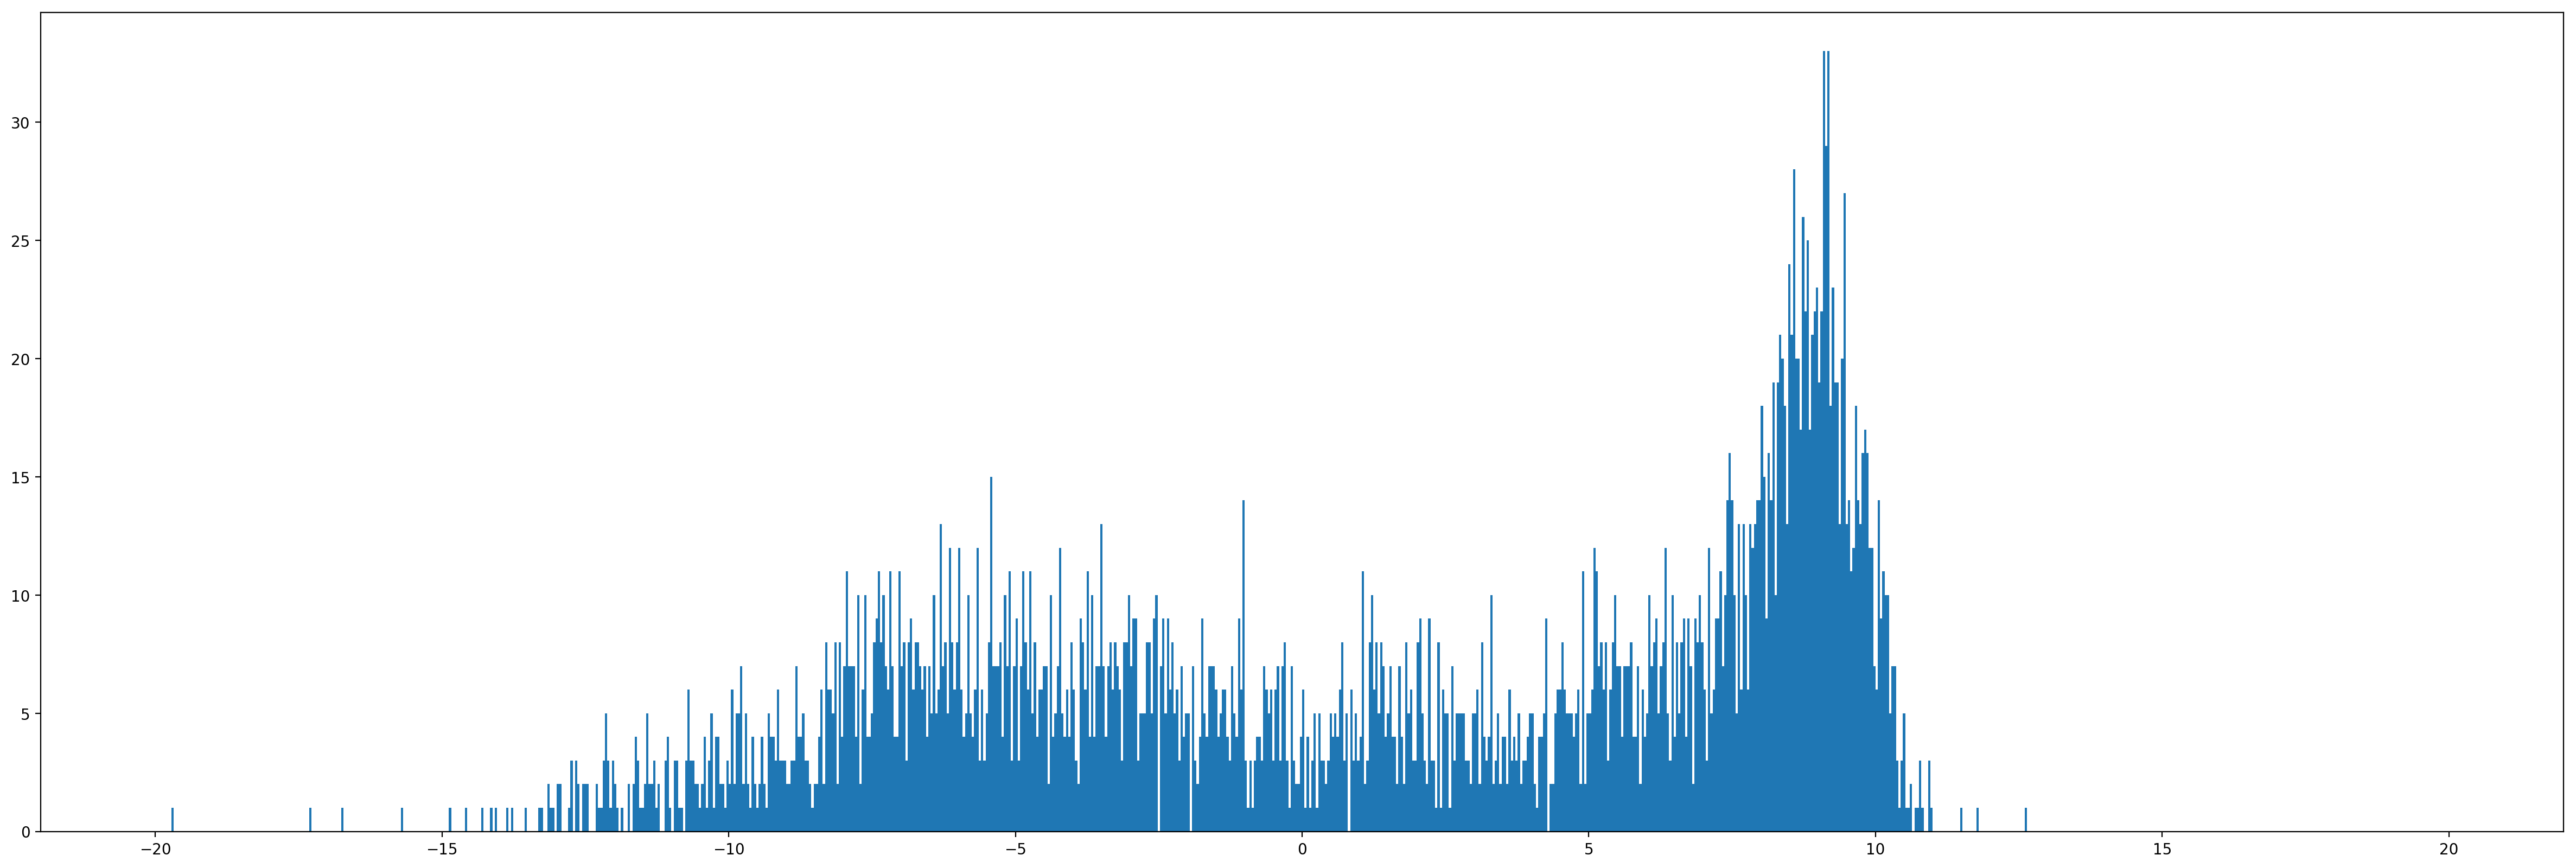

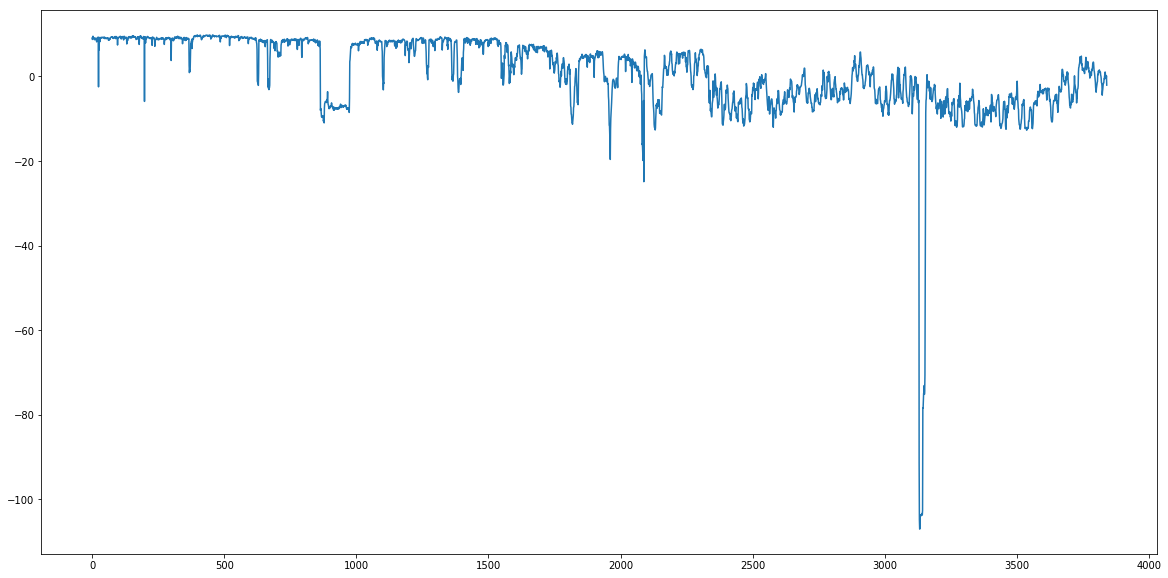

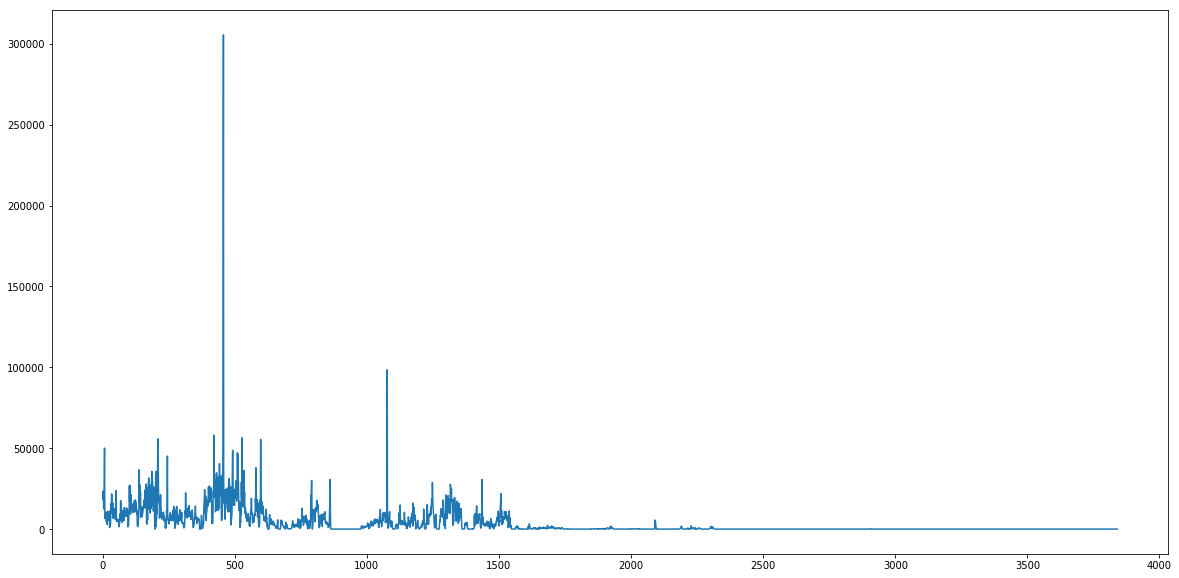

In [29]:
ex = np.exp(y_data)
plt.figure(figsize = (30, 10), dpi = 200)
plt.hist(y_data, bins = 1000, range = (-20, 20))
plt.show()
plt.figure(figsize = (20, 10))
plt.plot(pred)
plt.show()
plt.figure(figsize = (20, 10))
plt.plot(np.exp(y_data))
plt.show()

In [30]:
param_count = 151
scores = []
for i in range(param_count):
    x_now_train = []
    x_now_test = []
    print('processing', i)
    for j in range(len(x_train)):
        x_now_train.append(list(x_train[j][:i]) + list(x_train[j][i + 1:]))
    for j in range(len(x_data)):
        x_now_test.append(list(x_data[j][:i]) + list(x_data[j][i + 1:]))
    x_now_train = np.array(x_now_train)
    x_now_test = np.array(x_now_test)
    current_model = xgboost.XGBRegressor()
    current_model.fit(x_now_train, y_train)
    cur_score = current_model.score(x_now_test, y_data)
    print(cur_score)
    scores.append(cur_score)
plt.figure(figsize = (20, 10))
plt.plot(scores)
plt.show()

('processing', 0)
0.9771997271866353
('processing', 1)
0.9713087157966632
('processing', 2)
0.9703084121088403
('processing', 3)
0.9707970927329813
('processing', 4)
0.9714558117076594
('processing', 5)
0.9712707273549032
('processing', 6)
0.9714531113764303
('processing', 7)
0.9701169696170827
('processing', 8)
0.9714538254385016
('processing', 9)
0.9719032376550221
('processing', 10)
0.9703753562788607
('processing', 11)
0.971433704063461
('processing', 12)
0.9706455934752132
('processing', 13)
0.9714548388787919
('processing', 14)
0.9707500214933402
('processing', 15)
0.9701775935970589
('processing', 16)
0.9714558117076594
('processing', 17)
0.9695488563686512
('processing', 18)
0.9714558117076594
('processing', 19)


KeyboardInterrupt: 

In [ ]:
scores = np.array(scores)

In [92]:
head_names = list(df)
manipulated = ['sect1_flow_16', 'sect1_flow_22', 'sect1_temperature_1', 
               'sect1_temperature_5', 'sect1_temperature_10', 
              'sect1_temperature_11']
print(manipulated)
getindex = {}
for name in manipulated:
    getindex[name] = head_names.index(name) - 1
print(getindex)

['sect1_flow_16', 'sect1_flow_22', 'sect1_temperature_1', 'sect1_temperature_5', 'sect1_temperature_10', 'sect1_temperature_11']
{'sect1_flow_16': 25, 'sect1_flow_22': 31, 'sect1_temperature_5': 50, 'sect1_temperature_1': 46, 'sect1_temperature_11': 56, 'sect1_temperature_10': 55}


('processing', [25])


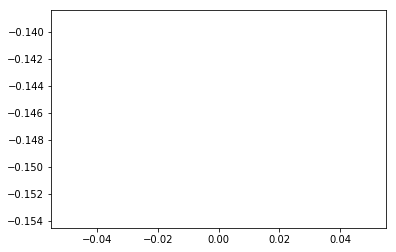

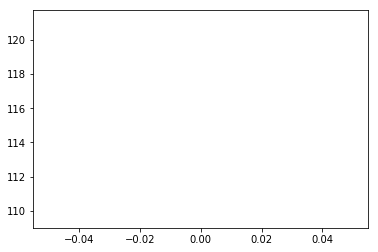

(-0.14645953640781006, -0.14645953640781006, -0.14645953640781006)


In [45]:
scores = []
errors = []
param_count = 151
for mask in range(1 << len(manipulated)):
    ignore_now = []
    for j in range(len(manipulated)):
        if (mask & (1 << j)) != 0:
            ignore_now.append(getindex[manipulated[j]])
    x_now_train = []
    x_now_test = []
    if len(ignore_now) == 0:
        continue
    print('processing', ignore_now)
    ignore_now = []
    
    for j in range(len(x_train) - 1):
        x_now_train.append([])
        for k in range(param_count):
            if not k in ignore_now:
                x_now_train[-1].append(x_train[j][k])
                
    for j in range(len(x_data) - 1):
        x_now_test.append([])
        for k in range(param_count):
            if not k in ignore_now:
                x_now_test[-1].append(x_data[j][k])
                
    x_now_train = np.array(x_now_train)
    x_now_test = np.array(x_now_test)
    current_model = xgboost.XGBRegressor()
    current_model.fit(x_now_train, y_train[1:])
    cur_score = current_model.score(x_now_test, y_data[1:])
    
    pred = current_model.predict(x_now_test)
    err = mean_squared_error(pred, y_data[1:])
    scores.append(cur_score)
    errors.append(err)
    break
plt.plot(scores)
plt.show()
plt.plot(errors)
plt.show()
scores = np.array(scores)
print(scores.min(), scores.max(), scores.mean())

In [32]:
import seaborn as sns

In [24]:
manipulated = ['sect1_flow_16', 'sect1_flow_22', 'sect1_temperature_1', 
               'sect1_temperature_5', 'sect1_temperature_10', 
              'sect1_temperature_11']


In [63]:
#обучаем по секторам

sect1=df.loc[:,'sect1_pressure_delta_1':'sect1_temperature_14']
sect2=df.loc[:,'sect2_analyzer_1':'sect2_analyzer_12']
sect3=df.loc[:,'sect3_analyzer_13':'sect3_temperature_28']
sect4=df.loc[:,'sect4_pressure_delta_1':'sect4_temperature_10']
sect_size=(sect1,sect2,sect3,sect4)

sect_score=np.ones(4)
for i in range(4):
    x_train, x_test, y_train, y_test=train_test_split(sect_size[i], df.target)

    regressor=xgboost.XGBRegressor()
    regressor.fit(x_train, y_train)
    sect_score[i]=regressor.score(x_test, y_test)
    
    
sect_score

array([0.94481952, 0.70616645, 0.9414117 , 0.91144705])

In [66]:
x_train, x_test, y_train, y_test=train_test_split(df[], df.target)

regressor=xgboost.XGBRegressor()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)


-0.08773071988042558

In [11]:
min_max_features=np.array(zip(df[manipulated].min(axis=0), df[manipulated].max(axis=0)))

In [12]:
min_max_features

array([[-186.20462179,    0.98882064],
       [ -17.32671551,    7.39321211],
       [-227.30871733,    4.1476895 ],
       [-242.12554383,    5.40134044],
       [-238.8706349 ,    4.80780156],
       [-213.1511376 ,    2.99361175]])

In [124]:
x0=min_max_features.mean(axis=1)


TypeError: only size-1 arrays can be converted to Python scalars

In [133]:
from scipy.optimize import minimize

def function(x):  
    return model.predict(np.array([x]))[0]
minimize(lambda x:-function(x), x0, bounds=min_max_features, method='TNC')    


     fun: 76.58438
     jac: array([0., 0., 0., 0., 0., 0.])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 1
     nit: 0
  status: 0
 success: True
       x: array([ -92.60790057,   -4.9667517 , -111.58051391, -118.36210169,
       -117.03141667, -105.07876293])

In [135]:
x0

array([ -92.60790057,   -4.9667517 , -111.58051391, -118.36210169,
       -117.03141667, -105.07876293])

IndexError: single positional indexer is out-of-bounds

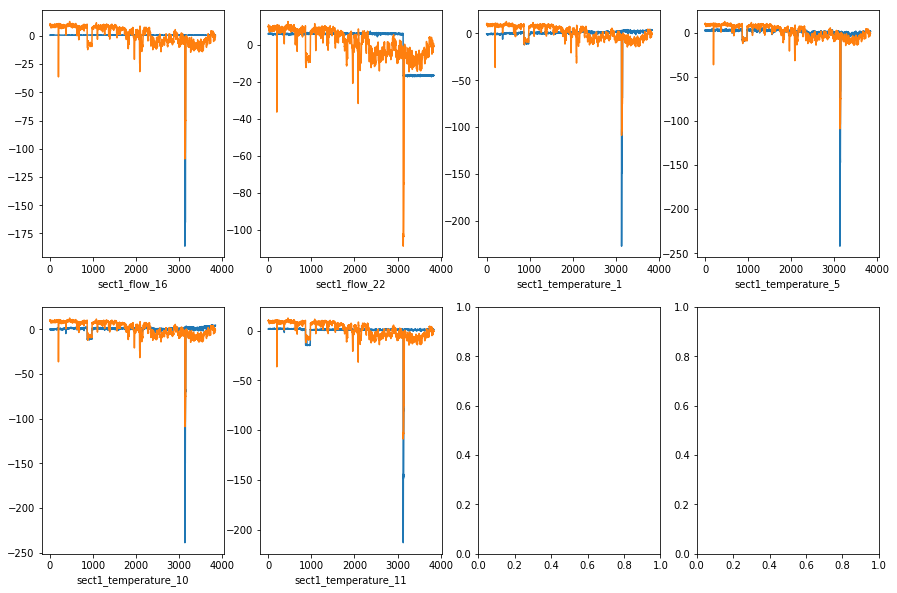

In [37]:
__, axes=plt.subplots(2, 4, figsize=(15,10))

df1=df[manipulated]

for i in range(8):

    axes[i//4,i%4].plot(df1.iloc[:,i])
    axes[i//4,i%4].set_xlabel(str(df1.columns[i]))
    axes[i//4,i%4].plot(df.target)
    

df[manipulated].groupby('target').sum().plot()


In [31]:
df1.columns[0]

'sect1_flow_16'

In [40]:
df.describe()

,sect1_pressure_delta_1,sect1_pressure_delta_2,sect1_pressure_delta_3,sect1_pressure_delta_4,sect1_pressure_delta_5,sect1_pressure_delta_6,sect1_pressure_delta_7,sect1_pressure_delta_8,sect1_pressure_delta_9,sect1_pressure_delta_10,...,sect4_temperature_5,sect4_temperature_6,sect4_temperature_7,sect4_temperature_8,sect4_temperature_9,sect4_temperature_10,outdoor_temperature,cat_lab_analyzer,cat_days,target
count,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,...,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000
mean,1.436943,1.479221,1.050670,0.214171,0.425065,1.154753,0.964775,0.578289,-0.641653,1.119857,...,-0.435696,-0.401324,-0.065512,-0.075713,-0.078227,-0.075759,-0.842087,-0.194979,-1.691005,0.883780
std,9.307210,9.274788,9.681998,9.886305,10.201255,9.749757,9.967639,10.296646,9.965020,9.782062,...,10.228026,10.409340,10.520427,10.533641,10.533236,10.533463,10.018559,10.261087,9.056461,10.032363
min,-29.328875,-33.745294,-51.364613,-68.689340,-31.015783,-17.239212,-16.952500,-13.813335,-27.516746,-25.265686,...,-138.592262,-197.520933,-165.092332,-153.762367,-152.579525,-154.914843,-34.217946,-56.319669,-17.728577,-108.934503
25%,-6.385921,-6.533720,-5.717983,-4.271063,-6.419692,-5.880274,-5.739253,-4.582935,-7.366244,-7.521281,...,-1.403396,-0.676173,-0.065893,0.662962,0.557952,0.519161,-8.121554,-3.859280,-9.111075,-4.756870
50%,4.851438,4.351908,4.140145,0.623285,2.825226,2.702082,2.269653,0.702506,-2.021722,3.909627,...,3.085217,1.946048,0.914036,0.684318,0.714872,0.690969,-0.343358,0.277886,-1.511576,2.287035
75%,10.134812,10.340276,9.326174,6.957001,8.470956,8.089146,7.314535,5.670175,5.675567,9.255849,...,4.819774,3.263518,1.763130,0.703741,0.872245,0.862701,6.528309,4.921644,6.080033,8.206997
max,11.665517,11.731537,12.427323,28.143746,63.187956,97.969668,111.962222,140.733416,36.225631,16.931963,...,12.265062,8.979314,3.841716,1.525708,1.883851,30.586115,23.068328,21.357732,13.718990,12.629718


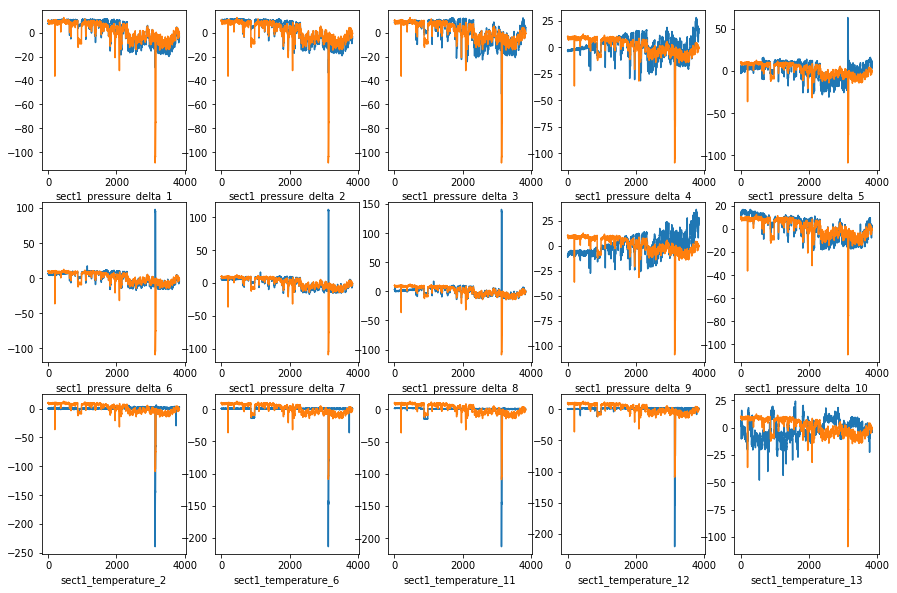

In [77]:
constant=['sect1_pressure_delta_1', 'sect1_pressure_delta_2',
                   'sect1_pressure_delta_3', 'sect1_pressure_delta_4',
                   'sect1_pressure_delta_5', 'sect1_pressure_delta_6',
                   'sect1_pressure_delta_7', 'sect1_pressure_delta_8',
                   'sect1_pressure_delta_9', 'sect1_pressure_delta_10',
                   'sect1_temperature_2', 'sect1_temperature_6',
                   'sect1_temperature_11', 'sect1_temperature_12',
                   'sect1_temperature_13', 'sect1_temperature_14']
__, axes=plt.subplots(3, 5, figsize=(15,10))
df1=df[constant]
for i in range(15):

    axes[i//5,i%5].plot(df1.iloc[:,i])
    axes[i//5,i%5].set_xlabel(str(df1.columns[i]))
    axes[i//5,i%5].plot(df.target)
    







In [60]:
constant.shape[0]

15

In [76]:
df1=df[constant]
df1.describe()

,sect1_pressure_delta_1,sect1_pressure_delta_2,sect1_pressure_delta_3,sect1_pressure_delta_4,sect1_pressure_delta_5,sect1_pressure_delta_6,sect1_pressure_delta_7,sect1_pressure_delta_8,sect1_pressure_delta_9,sect1_pressure_delta_10,sect1_temperature_2,sect1_temperature_6,sect1_temperature_11,sect1_temperature_12,sect1_temperature_13,sect1_temperature_14
count,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000
mean,1.436943,1.479221,1.050670,0.214171,0.425065,1.154753,0.964775,0.578289,-0.641653,1.119857,-0.055824,-0.093722,-0.078833,-0.006765,-1.731543,-0.040534
std,9.307210,9.274788,9.681998,9.886305,10.201255,9.749757,9.967639,10.296646,9.965020,9.782062,10.468487,10.521718,10.532103,10.518721,8.465970,9.995911
min,-29.328875,-33.745294,-51.364613,-68.689340,-31.015783,-17.239212,-16.952500,-13.813335,-27.516746,-25.265686,-239.189990,-214.035555,-213.151138,-220.425767,-47.983080,-11.966986
25%,-6.385921,-6.533720,-5.717983,-4.271063,-6.419692,-5.880274,-5.739253,-4.582935,-7.366244,-7.521281,0.026508,0.790733,0.787134,0.718973,-7.629596,-7.628085
50%,4.851438,4.351908,4.140145,0.623285,2.825226,2.702082,2.269653,0.702506,-2.021722,3.909627,0.572932,1.076902,1.016897,1.172792,-2.144980,-6.950283
75%,10.134812,10.340276,9.326174,6.957001,8.470956,8.089146,7.314535,5.670175,5.675567,9.255849,1.505968,1.338868,1.373413,1.448024,3.992464,14.357388
max,11.665517,11.731537,12.427323,28.143746,63.187956,97.969668,111.962222,140.733416,36.225631,16.931963,5.911144,6.775105,2.993612,3.028952,24.260014,14.612260


In [78]:
from scipy.optimize import minimize, rosen, rosen_der

In [106]:
minimize(model, x0=[0.1, 1. ,6., 3. ,4., 2.5], bounds=min_max_features, method='TNC')

TypeError: 'XGBRegressor' object is not callable

In [101]:
x_train.shape

(2880, 6)